In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [15]:
wine=load_diabetes()


In [16]:
my_df=pd.DataFrame(wine.data,columns=wine.feature_names)

In [17]:
my_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [28]:
my_df["target"]=wine.target
my_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [19]:
x=my_df.drop('target', axis=1)
y=my_df['target']
x.shape,y.shape

((442, 10), (442,))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
print("Training set shape: ", x_train.shape,y_train.shape)

print("Testing set shape: ", x_test.shape,y_test.shape)

Training set shape:  (353, 10) (353,)
Testing set shape:  (89, 10) (89,)


In [22]:
from sklearn.linear_model import LinearRegression
# import LinearRegresssion
# create a linear regression model
lr=LinearRegression()

In [23]:
# train the model on the training set -this is how the model Learns
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
# predict the testing set
# y_preds are predicted values of the target variable based on the features
# Once we have those preds , we can compare the actual values od the target
# To evaluate the perfomence of the model.
y_pred=lr.predict(x_test)
y_pred.shape

(89,)

In [25]:
# some import
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Evaluate the perfomence of the model
# r2: varience of the dependent variable (target) explained by the independent variable (features)
# how well the model fits the data . Higher is better
r2=r2_score(y_test,y_pred)

# MSE: Avrage Squared disance between the predicted and actual values. lower is better

mse=mean_squared_error(y_test,y_pred)
# MAE: Avrage Absolute disance between the predicted and actual values. lower is better

mae=mean_absolute_error(y_test,y_pred)

# Intercept: starting point of the regression line on the y-axis.
# Value of the dependent variable (target) when the independent variables (features) are zero 
# If positive number , target increase as features increase , if nagative - opposite
intercept=lr.intercept_



# printing the process
print("R2 score",r2)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error :" ,mae)
print("intercept" ,intercept)

R2 score 0.4526027629719195
Mean Squared Error :  2900.1936284934814
Mean Absolute Error : 42.79409467959994
intercept 151.34560453985995


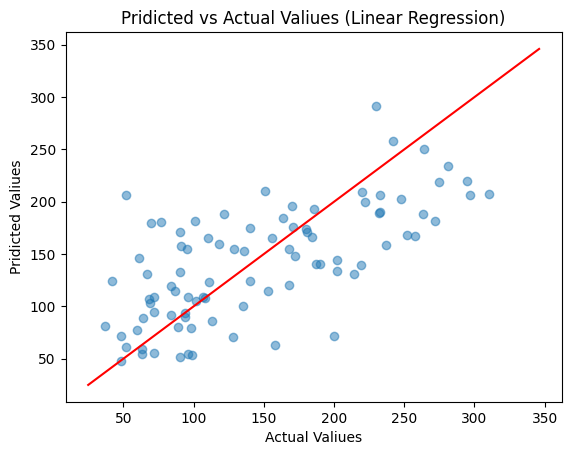

In [26]:
import matplotlib.pyplot as plt
# Plot the pridicted vs actual values 
# predicted values of the target variable are platted on the x-axis
# Actual values of the target variable are plotted on the y-axis
# if the model is a good fit , the points should be close to the diagonal line.
# indicating a strong linear relationship between the actual and predicted values.
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color="red")
plt.xlabel("Actual Valiues")
plt.ylabel("Pridicted Valiues")
plt.title("Pridicted vs Actual Valiues (Linear Regression)")
plt.show()
 

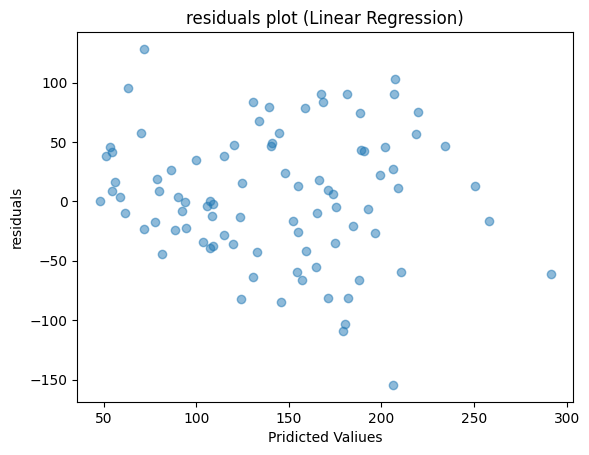

In [27]:
# Plot the residuals
# The residuals are plotted against the predicted values of the target variable.
# if the linear regression model is a good fit for the data,
# the residual plot should show a random scatter of the points around zero
# With no discernable trend.

plt.scatter(y_pred,y_test-y_pred,alpha=0.5)

plt.xlabel("Pridicted Valiues")
plt.ylabel("residuals")
plt.title("residuals plot (Linear Regression)")
plt.show()
